In [43]:
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Lasso, Ridge, LogisticRegression
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import StandardScaler

In [2]:
home_wl_df = pd.read_csv('nbaHomeWinLossModelDataset.csv')
home_wl_df = home_wl_df.dropna()

In [3]:
validation = home_wl_df[home_wl_df['SEASON'] == '2022-23']
modelData = home_wl_df[home_wl_df['SEASON'] != '2022-23']
# modelData = home_wl_df[home_wl_df['SEASON'] != '2022-23'].sample(frac=1)

In [4]:
# X = X.drop(X.columns[0], axis=1)
modelData.columns

Index(['Unnamed: 0', 'HOME_LAST_GAME_OE', 'HOME_LAST_GAME_HOME_WIN_PCTG',
       'HOME_NUM_REST_DAYS', 'HOME_LAST_GAME_AWAY_WIN_PCTG',
       'HOME_LAST_GAME_TOTAL_WIN_PCTG',
       'HOME_LAST_GAME_ROLLING_SCORING_MARGIN', 'HOME_LAST_GAME_ROLLING_OE',
       'HOME_W', 'SEASON', 'AWAY_LAST_GAME_OE', 'AWAY_LAST_GAME_HOME_WIN_PCTG',
       'AWAY_NUM_REST_DAYS', 'AWAY_LAST_GAME_AWAY_WIN_PCTG',
       'AWAY_LAST_GAME_TOTAL_WIN_PCTG',
       'AWAY_LAST_GAME_ROLLING_SCORING_MARGIN', 'AWAY_LAST_GAME_ROLLING_OE'],
      dtype='object')

In [53]:
X = modelData.drop(['Unnamed: 0', 'HOME_W','SEASON'],axis=1)
y = modelData['HOME_W']

### random seed ###
seed = 42
### ~~~~~~~~~~~~ ###
X_train, X_test, y_train, y_test = train_test_split(X , y, test_size=.33, stratify=y, random_state=seed)

In [54]:
X.describe()

,HOME_LAST_GAME_OE,HOME_LAST_GAME_HOME_WIN_PCTG,HOME_NUM_REST_DAYS,HOME_LAST_GAME_AWAY_WIN_PCTG,HOME_LAST_GAME_TOTAL_WIN_PCTG,HOME_LAST_GAME_ROLLING_SCORING_MARGIN,HOME_LAST_GAME_ROLLING_OE,AWAY_LAST_GAME_OE,AWAY_LAST_GAME_HOME_WIN_PCTG,AWAY_NUM_REST_DAYS,AWAY_LAST_GAME_AWAY_WIN_PCTG,AWAY_LAST_GAME_TOTAL_WIN_PCTG,AWAY_LAST_GAME_ROLLING_SCORING_MARGIN,AWAY_LAST_GAME_ROLLING_OE
count,2223.000000,2223.000000,2223.000000,2223.000000,2223.000000,2223.000000,2223.000000,2223.000000,2223.000000,2223.000000,2223.000000,2223.000000,2223.000000,2223.000000
mean,0.560969,0.536048,2.104813,0.465854,0.500226,0.090043,0.560339,0.560984,0.535533,2.046784,0.466949,0.500993,-0.045134,0.561011
std,0.053860,0.191289,0.981507,0.192244,0.155333,9.679940,0.034323,0.053657,0.187518,1.034320,0.194919,0.155033,9.531111,0.034088
min,0.317308,0.000000,1.000000,0.000000,0.000000,-36.333333,0.429059,0.326923,0.000000,1.000000,0.000000,0.000000,-33.000000,0.438441
25%,0.523624,0.412779,2.000000,0.333333,0.400000,-6.333333,0.538135,0.525424,0.409674,2.000000,0.333333,0.400000,-6.333333,0.538608
50%,0.561404,0.541667,2.000000,0.470588,0.500000,0.000000,0.561094,0.562500,0.535714,2.000000,0.466667,0.500000,0.000000,0.561276
75%,0.598361,0.666667,2.000000,0.583333,0.603774,6.666667,0.582529,0.598214,0.666667,2.000000,0.586207,0.611111,6.166667,0.585132
max,0.739130,1.000000,9.000000,1.000000,1.000000,31.666667,0.677515,0.759398,1.000000,13.000000,1.000000,1.000000,35.666667,0.657538


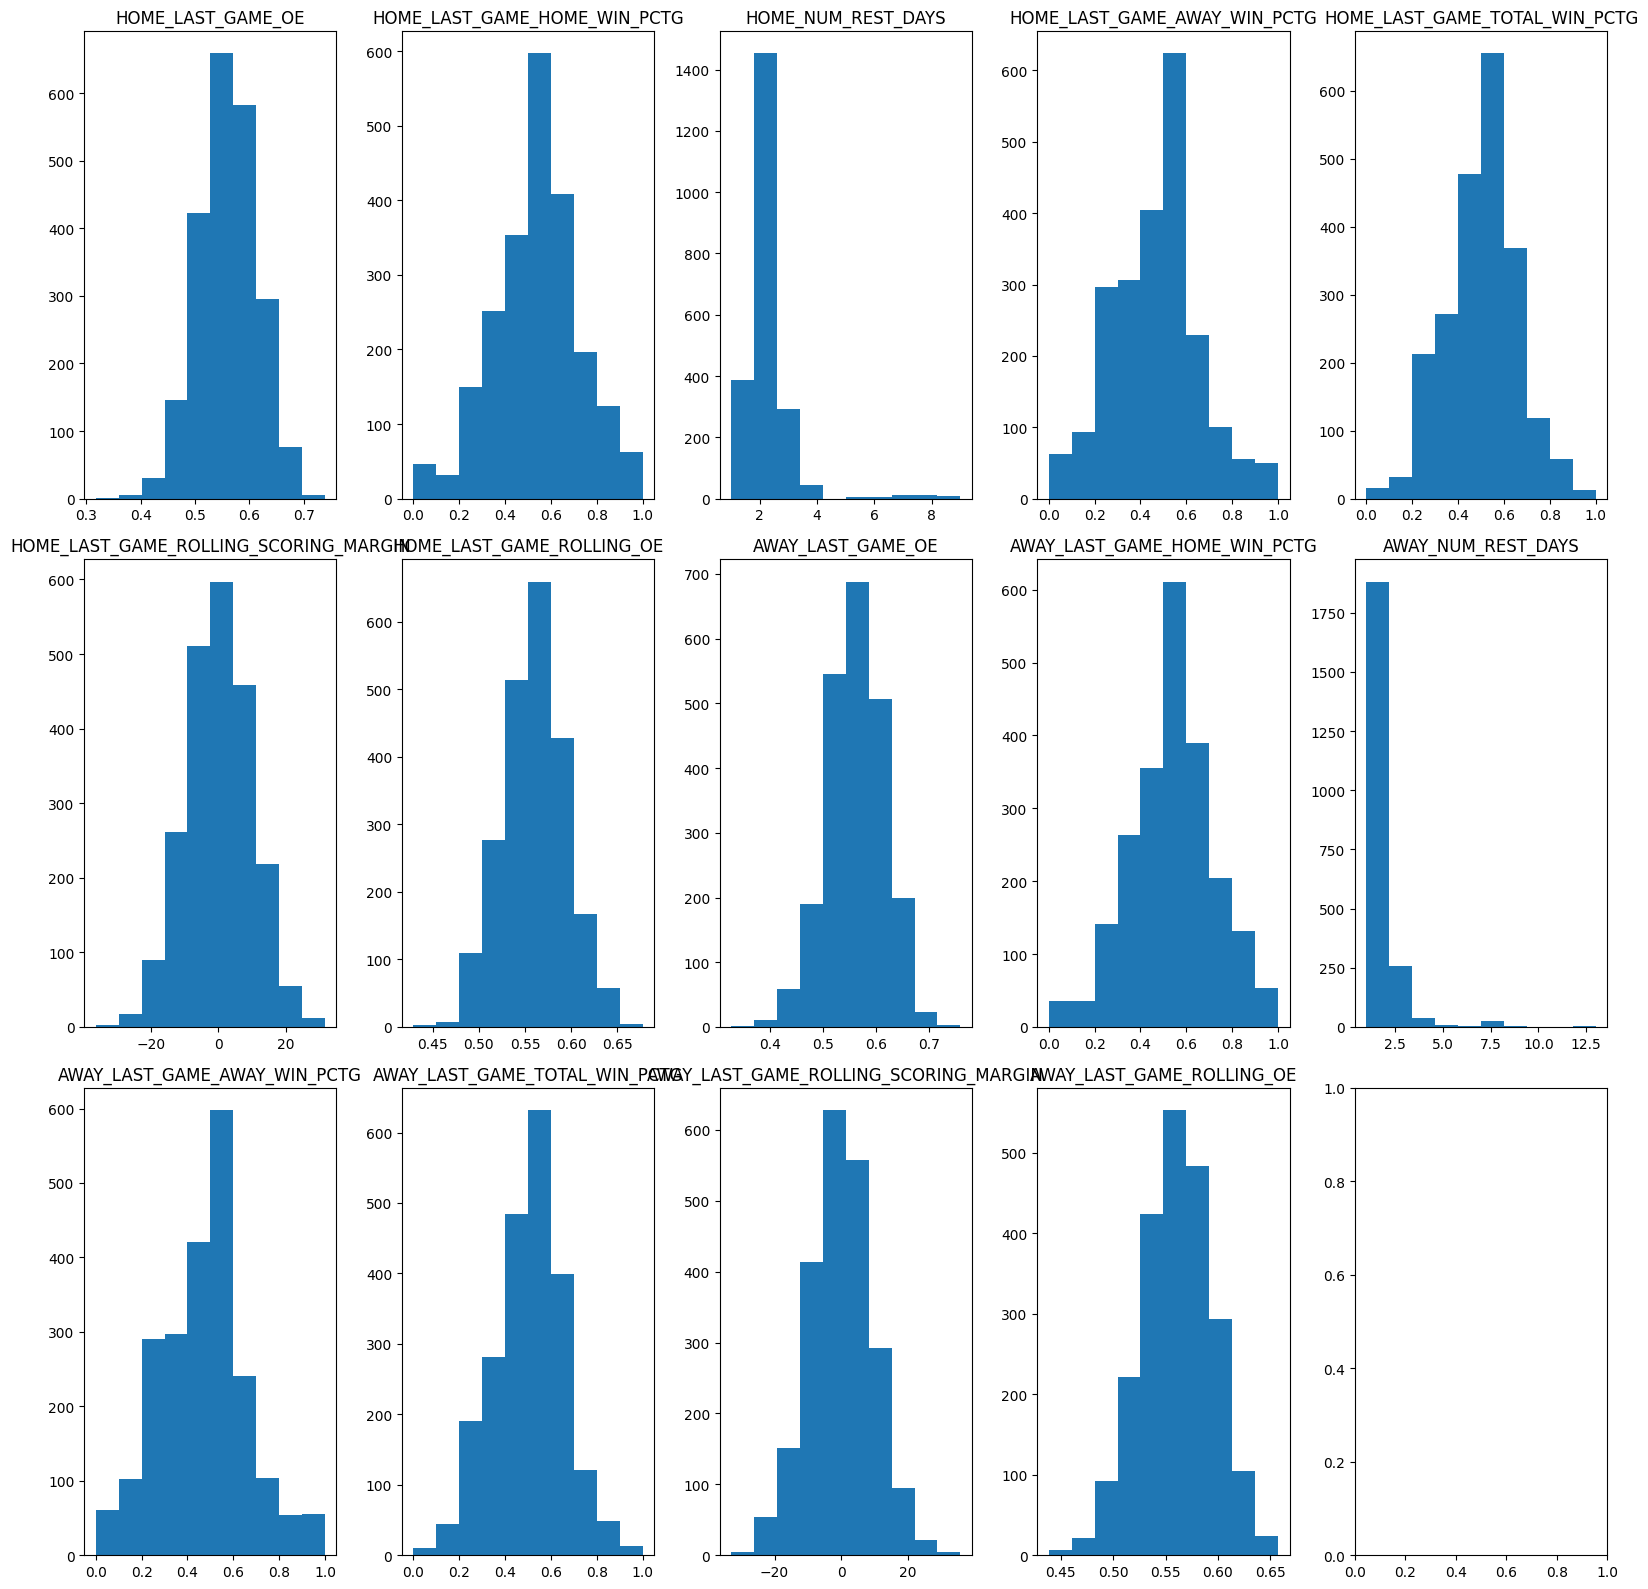

In [55]:
fig, axs = plt.subplots(3, 5, figsize=(16, 16))
# fig, axs = plt.subplots(3, len(X.columns), figsize=(5, 5*len(X.columns)))

for i, col in enumerate(X.columns):
    x = i // 5
    y = i % 5
    axs[x][y].hist(X[col])
    axs[x][y].set_title(col)

plt.tight_layout()
plt.show()


In [56]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [57]:
weighted_lrg = LogisticRegression(class_weight='balanced').fit(X_train_scaled, y_train)

y_pred = weighted_lrg.predict(X_test_scaled)

print('Accuracy: ', accuracy_score(y_test, y_pred))
print('Precision: ', precision_score(y_test, y_pred))
print('Recall: ', recall_score(y_test, y_pred))
print('F1: ', f1_score(y_test, y_pred))

Accuracy:  0.6158038147138964
Precision:  0.6569920844327177
Recall:  0.6209476309226932
F1:  0.6384615384615385


  0%|          | 0/10 [00:00<?, ?it/s]

100%|██████████| 10/10 [00:13<00:00,  1.39s/it]


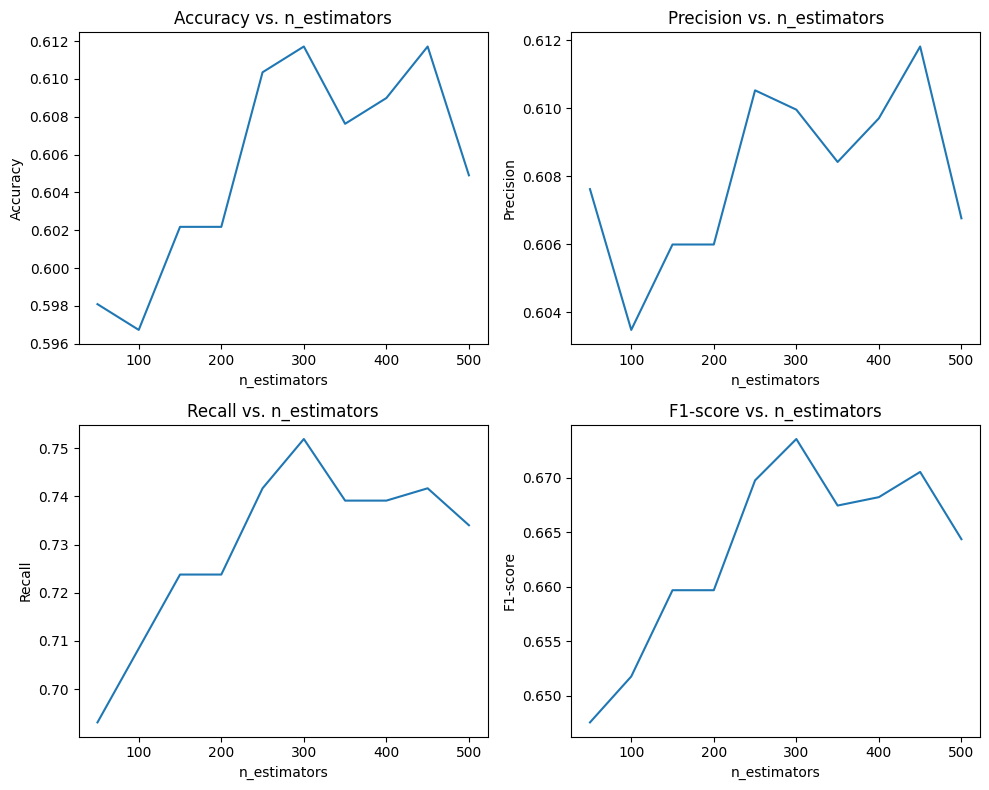

In [20]:
# Define the range of n_estimators values
n_estimators_range = range(50, 501, 50)

# Create empty lists to store the evaluation metrics
accuracy_scores = []
precision_scores = []
recall_scores = []
f1_scores = []

# Loop through the n_estimators values
for n_estimators in tqdm(n_estimators_range):
    # Create a Random Forest classifier with the current n_estimators value
    rf_classifier = RandomForestClassifier(n_estimators=n_estimators, random_state=42)
    
    # Train the classifier
    rf_classifier.fit(X_train, y_train)
    
    # Make predictions on the test set
    y_pred = rf_classifier.predict(X_test)
    
    # Calculate the evaluation metrics and append them to the respective lists
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    accuracy_scores.append(accuracy)
    precision_scores.append(precision)
    recall_scores.append(recall)
    f1_scores.append(f1)

fig, axs = plt.subplots(2, 2, figsize=(10, 8))

# Plot the accuracy scores
axs[0, 0].plot(n_estimators_range, accuracy_scores)
axs[0, 0].set_xlabel('n_estimators')
axs[0, 0].set_ylabel('Accuracy')
axs[0, 0].set_title('Accuracy vs. n_estimators')

# Plot the precision scores
axs[0, 1].plot(n_estimators_range, precision_scores)
axs[0, 1].set_xlabel('n_estimators')
axs[0, 1].set_ylabel('Precision')
axs[0, 1].set_title('Precision vs. n_estimators')

# Plot the recall scores
axs[1, 0].plot(n_estimators_range, recall_scores)
axs[1, 0].set_xlabel('n_estimators')
axs[1, 0].set_ylabel('Recall')
axs[1, 0].set_title('Recall vs. n_estimators')

# Plot the F1-scores
axs[1, 1].plot(n_estimators_range, f1_scores)
axs[1, 1].set_xlabel('n_estimators')
axs[1, 1].set_ylabel('F1-score')
axs[1, 1].set_title('F1-score vs. n_estimators')

plt.tight_layout()
plt.show()


In [26]:
## Applying Lasso and Ridge to the dataset

# Perform feature selection using Lasso or Ridge regression
lasso = Lasso(alpha=0.1)
lasso.fit(X_train, y_train)
selected_features_lasso = X_train.columns[lasso.coef_ != 0]

ridge = Ridge(alpha=0.1)
ridge.fit(X_train, y_train)
selected_features_ridge = X_train.columns[ridge.coef_ > 0.1]  # Adjust the threshold as needed

# Train a Random Forest classifier using the selected features
rf_classifier_lasso = RandomForestClassifier(n_estimators=300, random_state=42)
rf_classifier_lasso.fit(X_train[selected_features_lasso], y_train)

rf_classifier_ridge = RandomForestClassifier(n_estimators=300, random_state=42)
rf_classifier_ridge.fit(X_train[selected_features_ridge], y_train)

RandomForestClassifier(n_estimators=300, random_state=42)

should be doing a for loop for the below code

In [29]:
# Make predictions on the test set
y_pred_lasso = rf_classifier_lasso.predict(X_test[selected_features_lasso])

accuracy_score(y_test, y_pred_lasso)

0.5517711171662125